In [83]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

# Load the data from the Excel file
file_path = r"C:\Users\Home\Downloads\insurance_data.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(data.head())

   age        bmi  children  annual_income  gender smoker     region  \
0   56  27.385591         0         198048    Male     No  Northwest   
1   69  33.536523         0         111502    Male    Yes  Southwest   
2   46  29.328771         3         133943  Female    Yes  Southwest   
3   32  39.942315         3         129850    Male     No  Northwest   
4   60  33.810078         2          65095    Male     No  Southwest   

   insurance_amount  
0       7623.460870  
1       7721.707634  
2       7190.347808  
3       7994.683497  
4       5630.143352  


In [85]:
df

,age,bmi,children,annual_income,gender,smoker,region,insurance_amount
0,56,27.385591,0,198048,Male,No,Northwest,7623.460870
1,69,33.536523,0,111502,Male,Yes,Southwest,7721.707634
2,46,29.328771,3,133943,Female,Yes,Southwest,7190.347808
3,32,39.942315,3,129850,Male,No,Northwest,7994.683497
4,60,33.810078,2,65095,Male,No,Southwest,5630.143352
...,...,...,...,...,...,...,...,...
744,54,36.179184,4,99818,Female,Yes,Southeast,7972.127041
745,53,37.855913,4,134589,Female,Yes,Southwest,8868.044386
746,52,35.344157,3,165406,Female,No,Northeast,8051.230370
747,36,17.722959,0,114715,Female,No,Northwest,4688.636278


In [62]:
df.tail(5)

,age,bmi,children,annual_income,gender,smoker,region,insurance_amount
744,54,36.179184,4,99818,Female,Yes,Southeast,7972.127041
745,53,37.855913,4,134589,Female,Yes,Southwest,8868.044386
746,52,35.344157,3,165406,Female,No,Northeast,8051.230370
747,36,17.722959,0,114715,Female,No,Northwest,4688.636278
748,37,18.724796,0,26644,Male,No,Southwest,2809.413031


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               749 non-null    int64  
 1   bmi               749 non-null    float64
 2   children          749 non-null    int64  
 3   annual_income     749 non-null    int64  
 4   gender            749 non-null    object 
 5   smoker            749 non-null    object 
 6   region            749 non-null    object 
 7   insurance_amount  749 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 46.9+ KB


In [64]:
df.describe().round(2)

,age,bmi,children,annual_income,insurance_amount
count,749.00,749.00,749.00,749.00,749.00
mean,44.16,27.76,2.03,110592.85,6369.55
std,14.89,7.16,1.42,53129.09,1450.63
min,18.00,15.01,0.00,20174.00,2809.41
25%,32.00,21.59,1.00,63937.00,5248.56
50%,45.00,28.16,2.00,111118.00,6411.05
75%,56.00,33.87,3.00,156198.00,7540.79
max,69.00,39.98,4.00,199588.00,9930.68


In [65]:
print(df['bmi'].value_counts())

bmi
27.385591    1
23.148137    1
26.552432    1
15.030796    1
29.958182    1
            ..
37.584095    1
31.166623    1
32.329380    1
16.289895    1
18.724796    1
Name: count, Length: 749, dtype: int64


In [66]:
df.shape

(749, 8)

In [67]:
df.dtypes

age                   int64
bmi                 float64
children              int64
annual_income         int64
gender               object
smoker               object
region               object
insurance_amount    float64
dtype: object

In [68]:
df.nunique

<bound method DataFrame.nunique of      age        bmi  children  annual_income  gender smoker     region  \
0     56  27.385591         0         198048    Male     No  Northwest   
1     69  33.536523         0         111502    Male    Yes  Southwest   
2     46  29.328771         3         133943  Female    Yes  Southwest   
3     32  39.942315         3         129850    Male     No  Northwest   
4     60  33.810078         2          65095    Male     No  Southwest   
..   ...        ...       ...            ...     ...    ...        ...   
744   54  36.179184         4          99818  Female    Yes  Southeast   
745   53  37.855913         4         134589  Female    Yes  Southwest   
746   52  35.344157         3         165406  Female     No  Northeast   
747   36  17.722959         0         114715  Female     No  Northwest   
748   37  18.724796         0          26644    Male     No  Southwest   

     insurance_amount  
0         7623.460870  
1         7721.707634  
2   

In [69]:
df.isnull().sum()

age                 0
bmi                 0
children            0
annual_income       0
gender              0
smoker              0
region              0
insurance_amount    0
dtype: int64

In [70]:
df.columns

Index(['age', 'bmi', 'children', 'annual_income', 'gender', 'smoker', 'region',
       'insurance_amount'],
      dtype='object')

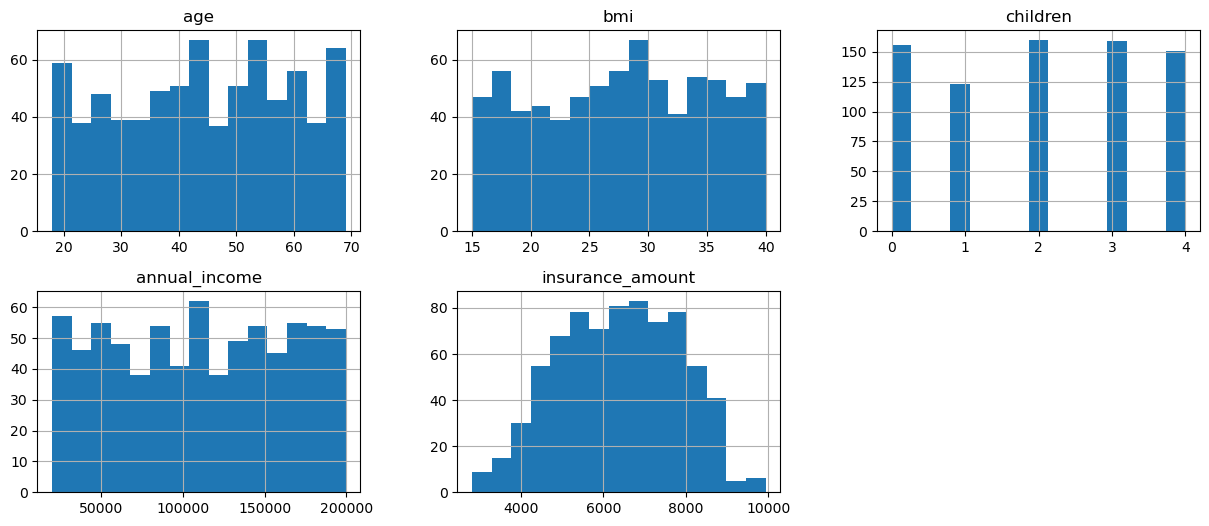

In [87]:
# Univariate Analysis
numerical_columns = ['age', 'bmi', 'children', 'annual_income', 'insurance_amount']
categorical_columns = ['gender', 'smoker', 'region']

# Histograms for numerical columns
df[numerical_columns].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()

C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

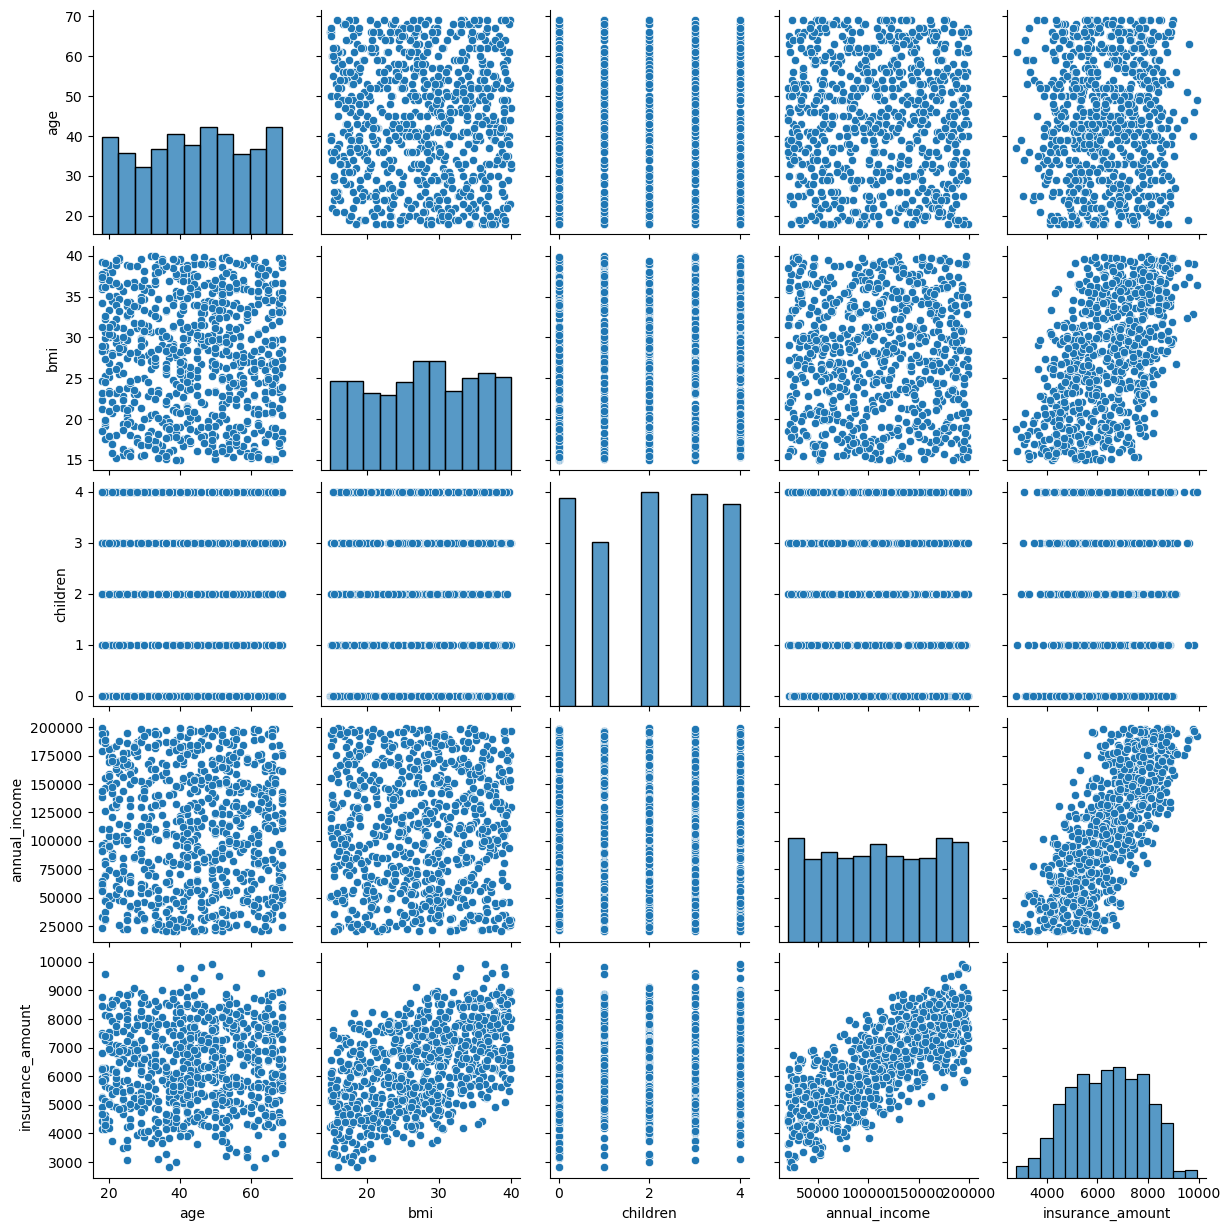

In [117]:
# Pairplot for numerical columns
sns.pairplot(df[numerical_columns])
plt.show()

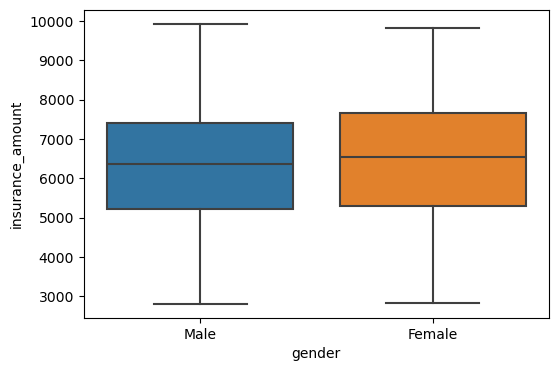

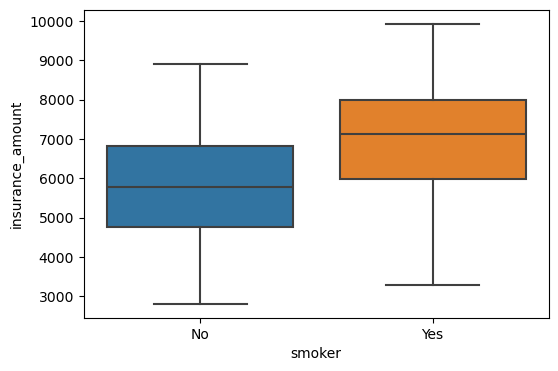

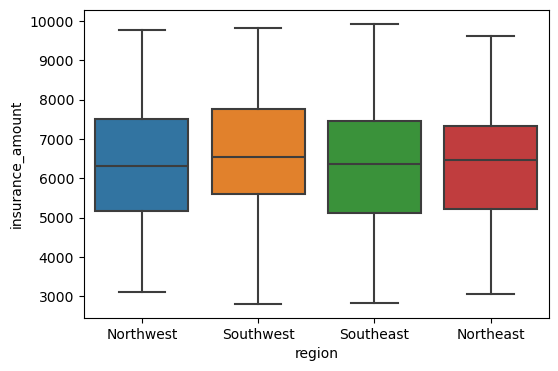

In [119]:
# Boxplots for categorical columns vs insurance amount
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=column, y='insurance_amount')
    plt.show()

In [139]:
import sweetviz as sv
import pandas as pd
 
# Assuming df is your DataFrame
# df = pd.read_csv('your_data_file.csv')  # Example of loading data
 
# Generate the Sweetviz report
report = sv.analyze(df)
 
# Show the report
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [141]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [143]:
df.describe().round(2)

,age,bmi,children,annual_income,insurance_amount,gender_Male,smoker_Yes,region_Northwest,region_Southeast,region_Southwest
count,749.00,749.00,749.00,749.00,749.00,749.0,749.00,749.00,749.00,749.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.0,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00
min,-1.76,-1.78,-1.43,-1.70,-2.46,-1.0,-0.94,-0.58,-0.56,-0.57
25%,-0.82,-0.86,-0.73,-0.88,-0.77,-1.0,-0.94,-0.58,-0.56,-0.57
50%,0.06,0.06,-0.02,0.01,0.03,1.0,-0.94,-0.58,-0.56,-0.57
75%,0.80,0.85,0.68,0.86,0.81,1.0,1.06,1.72,-0.56,-0.57
max,1.67,1.71,1.38,1.68,2.46,1.0,1.06,1.72,1.78,1.77


In [147]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
 
print(df)

          age       bmi  children  annual_income  insurance_amount  \
0    0.795249 -0.051904 -1.433459       1.647188          0.864972   
1    1.668722  0.807168 -1.433459       0.017123          0.932744   
2    0.123347  0.219491  0.680047       0.439792          0.566202   
3   -0.817317  1.701835  0.680047       0.362702          1.121047   
4    1.064010  0.845374 -0.024455      -0.856936         -0.510054   
..        ...       ...       ...            ...               ...   
744  0.660868  1.176256  1.384549      -0.202941          1.105488   
745  0.593678  1.410437  1.384549       0.451959          1.723507   
746  0.526488  1.059632  0.680047       1.032387          1.160055   
747 -0.548556 -1.401439 -1.433459       0.077639         -1.159523   
748 -0.481366 -1.261517 -1.433459      -1.581148         -2.455845   

     gender_Male  smoker_Yes  region_Northwest  region_Southeast  \
0       0.996003   -0.944147          1.715257         -0.562445   
1       0.996003    1.0

In [149]:
# Define features and target
X = df.drop('insurance_amount', axis=1)
y = df['insurance_amount']

In [151]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [155]:
# Evaluation
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Linear Regression - R²: {r2:.4f}, Adjusted R²: {adj_r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4f}')

Linear Regression - R²: 0.9655, Adjusted R²: 0.9651, RMSE: 0.1719, MAE: 0.1381, MAPE: 69.6193


In [157]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [159]:
# Evaluation
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Decision Tree - R²: {r2:.4f}, Adjusted R²: {adj_r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4f}')

Decision Tree - R²: 0.8852, Adjusted R²: 0.8838, RMSE: 0.3137, MAE: 0.2510, MAPE: 86.9880


In [167]:
!pip install xgboost
import xgboost 
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

In [169]:
# Evaluation
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'XGBoost - R²: {r2:.4f}, Adjusted R²: {adj_r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4f}')

XGBoost - R²: 0.9327, Adjusted R²: 0.9319, RMSE: 0.2402, MAE: 0.1975, MAPE: 114.8480


Model selection xgboost model

In [171]:
# Cross-validation for XGBoost
cv_scores = cross_val_score(xg_reg, X, y, cv=5, scoring='r2')
print(f'XGBoost Cross-Validation R²: {cv_scores.mean():.4f}')

XGBoost Cross-Validation R²: 0.9488


Feature selection

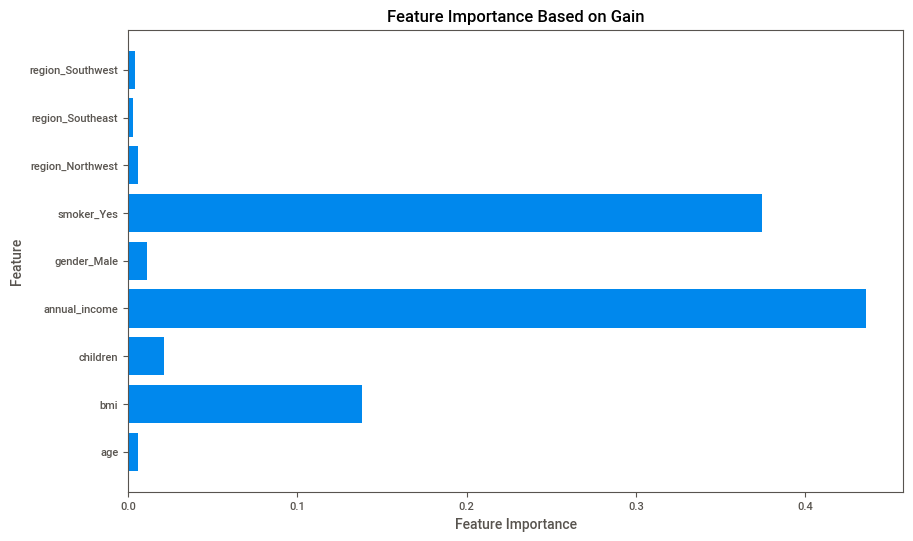

In [179]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
 
# Assuming you have already trained your XGBoost model and stored it in xg_reg
 
# Get feature importance based on gain
importance = xg_reg.feature_importances_
 
# Get the feature names
feature_names = xg_reg.get_booster().feature_names
 
# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(np.arange(len(importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Based on Gain')
plt.show()

In [185]:
!pip install shape 
# SHAP values for XGBoost
import shap

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.8 MB 7.4 MB/s eta 0:00:06
   -- ------------------------------------- 2.1/38.8 MB 27.0 MB/s eta 0:00:02
   ---- ----------------------------------- 4.3/38.8 MB 34.2 MB/s eta 0:00:02
   ------ --------------------------------- 6.4/38.8 MB 37.3 MB/s eta 0:00:01
   -------- ------------------------------- 7.9/38.8 MB 38.7 MB/s eta 0:00:01
   ---------- ----------------------------- 9.9/38.8 MB 37.2 MB/s eta 0:00:01
   ------------- -------------------------- 12.6/38.8 MB 46.7 MB/s eta 0:00:01
   -------------- ------------------------- 14.3/38.8 MB 43.5 MB/s eta 0:00:01
   ----------------- ---------------------- 16.9/38.8 MB 46.7 MB/s eta 0:00:01
   ------------------- -------------------- 19.1/38.8 MB 46.7 MB/s eta 0:00:01
   --------------------- ------------------ 21.3/38.8 MB 50.4 MB/s eta 0:00:01
   ------------------------ --------------- 23.4/38.8 MB 46.9 MB/s e